##### DATA PREPROCESSING

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset

gamingData = pd.read_csv("3.1 Gaming_data.csv.csv")

# view the first 5 rows of the data
gamingData.head()

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [3]:
# view the dataset information

gamingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Steps   10 non-null     int64
 1   Points  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


<Axes: xlabel='Steps', ylabel='Points'>

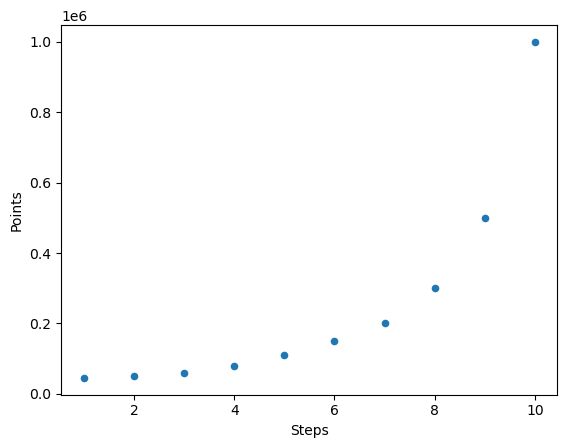

In [5]:
# view the scatter plot of the dataset

gamingData.plot(x="Steps", y="Points",kind="scatter")

In [ ]:
# split the data into feature and target

X = gamingData["Steps"].values.reshape(-1,1) # there is a need to reshape the feature to be a matrix
Y = gamingData["Points"].values

In [16]:
# view the shape of the feature

X.shape

(10, 1)

- Because of how comparatively small the daataset is, we won't have to split into training and test set

We would also fit the data using Linear Regression and Polynomial to make a comparison of the model performance on the data

In [17]:
# Fitting the data to Linear Regression Model

# Importing the Libraries
from sklearn.linear_model import LinearRegression

# Initiate the Linear model
linear_model = LinearRegression()

# fit the model
linear_model.fit(X,Y)

LinearRegression()

In [18]:
# Fit the polynomial regression

from sklearn.preprocessing import PolynomialFeatures

# Initiate the polynomial regression object with degree of 2
poly_reg = PolynomialFeatures(degree=2)

# fit and transform the feature to a polynomial feature
X_poly = poly_reg.fit_transform(X)

# create the Linear Model
linear_model1 = LinearRegression()

# fit the transformed data on the linear model
linear_model1.fit(X_poly, Y)

LinearRegression()

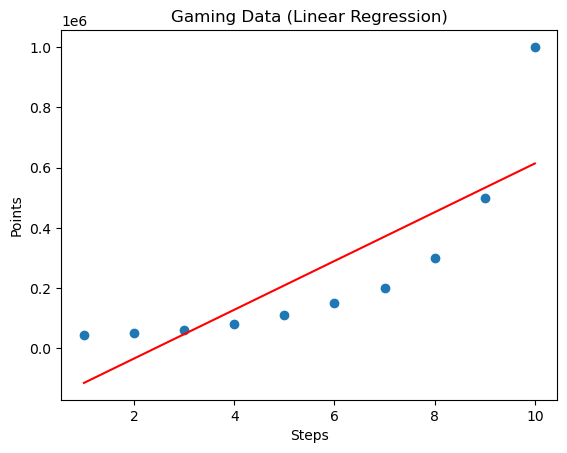

In [19]:
# visualize the linear regression result

plt.scatter(X,Y)
plt.plot(X, linear_model.predict(X), color="red")
plt.title("Gaming Data (Linear Regression)")
plt.xlabel("Steps")
plt.ylabel("Points")
plt.show()